In [1021]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

In [1022]:
df = pd.read_csv('Position_Salaries.csv')
X = np.array(df.iloc[:, 1:2].values)
y = np.array(df.iloc[:, -1].values)

In [1023]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [1024]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1025]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [1026]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = ct.fit_transform(X)
# print(X)

In [1027]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

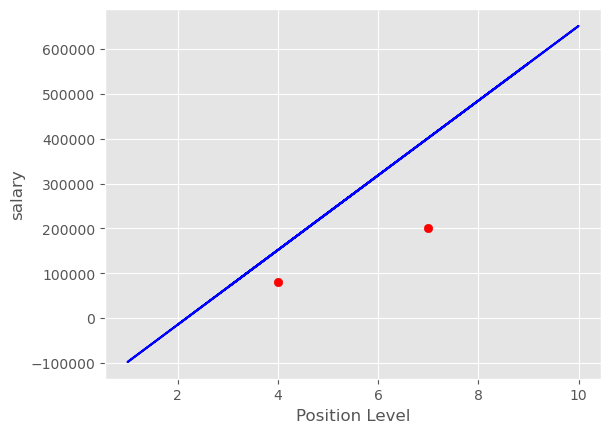

In [1028]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.xlabel('Position Level')
plt.ylabel('salary')
plt.show()

In [1029]:
from sklearn.preprocessing import PolynomialFeatures
plf = PolynomialFeatures(degree=5)
X_poly_train = plf.fit_transform(X_train)
poly_reg = LinearRegression(n_jobs=-1)
poly_reg.fit(X_poly_train, y_train)

LinearRegression(n_jobs=-1)

/tmp/ipykernel_175139/874163355.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train), max_x + 0.1, 0.1) # Add a small buffer to max_x


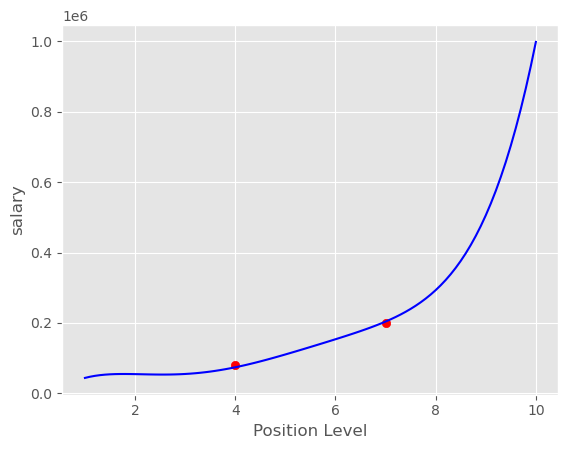

In [1030]:
max_x = max(max(X_train), max(X_test)) # Find max across both datasets
X_grid = np.arange(min(X_train), max_x + 0.1, 0.1) # Add a small buffer to max_x
X_grid = X_grid.reshape((len(X_grid), 1)) 

# Transform the X values for plotting
X_grid_poly = plf.transform(X_grid)

# Plot the data and the polynomial regression line
plt.scatter(X_test, y_test, color='red')
plt.plot(X_grid, poly_reg.predict(X_grid_poly), color='blue') 
plt.xlabel('Position Level')
plt.ylabel('salary')
plt.show()